# Model Selection Criteria for Sentiment Clasification

## Model Summaries

1. **siebert/sentiment-roberta-large-english**
   - **Training Data**: English text data, focusing on general sentiment analysis.

2. **jialicheng/electra-base-imdb**
   - **Training Data**: IMDb movie reviews, focusing on sentiment analysis for movie reviews.

3. **distilbert-base-uncased-finetuned-sst-2-english**
   - **Training Data**: Stanford Sentiment Treebank (SST-2), focusing on binary sentiment classification.

4. **dipawidia/xlnet-base-cased-product-review-sentiment-analysis**
   - **Training Data**: Product reviews, focusing on sentiment analysis for product reviews.

5. **textattack/albert-base-v2-SST-2**
   - **Training Data**: Stanford Sentiment Treebank (SST-2), focusing on binary sentiment classification.

6. **cardiffnlp/twitter-roberta-base-sentiment**
   - **Training Data**: Twitter data, focusing on sentiment analysis specific to tweets.

7. **nlptown/bert-base-multilingual-uncased-sentiment**
   - **Training Data**: Multilingual text data, focusing on sentiment analysis across multiple languages.


## Comparison Criteria

- Confidence Hypothesis Testing
- Sentiment Distribution
- Transformer Labels vs P(positive Sentiment)

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sentiment_outputs\sentiment_analysis_results_final.csv")

In [3]:
df.columns

Index(['#', 'Album Number', 'Album Name', 'Album Release Date', 'Track Number',
       'Track Name', 'Lyrics', 'lyrics_clean',
       'siebert/sentiment-roberta-large-english_sentiment',
       'siebert/sentiment-roberta-large-english_confidence',
       'siebert/sentiment-roberta-large-english_pos_prob',
       'cardiffnlp/twitter-roberta-base-sentiment_sentiment',
       'cardiffnlp/twitter-roberta-base-sentiment_confidence',
       'cardiffnlp/twitter-roberta-base-sentiment_pos_prob',
       'jialicheng/electra-base-imdb_sentiment',
       'jialicheng/electra-base-imdb_confidence',
       'jialicheng/electra-base-imdb_pos_prob',
       'textattack/albert-base-v2-SST-2_sentiment',
       'textattack/albert-base-v2-SST-2_confidence',
       'textattack/albert-base-v2-SST-2_pos_prob',
       'dipawidia/xlnet-base-cased-product-review-sentiment-analysis_sentiment',
       'dipawidia/xlnet-base-cased-product-review-sentiment-analysis_confidence',
       'dipawidia/xlnet-base-cased-produc

## Transformer Confidence in Sentiment Classification

## Confidence Stats Calculation

In [11]:
# Identify columns that end with "confidence"
confidence_columns = [col for col in df.columns if col.endswith("confidence")]

confidence_stats  ={col: {"Mean Confidence": df[col].mean(), "Standard Deviation": df[col].std()} for col in confidence_columns}

confidence_stats_df = pd.DataFrame(confidence_stats).T.reset_index()

# Rename the columns using .rename method
confidence_stats_df = confidence_stats_df.rename(columns={
    'index': 'Transformer_Model',
    'Mean Confidence': 'Mean Confidence',
    'Standard Deviation': 'St. Deviation'
})

confidence_stats_df = confidence_stats_df.sort_values(by = "Mean Confidence", ascending=False, ignore_index=True)
confidence_stats_df

,Transformer_Model,Mean Confidence,St. Deviation
0,siebert/sentiment-roberta-large-english_confid...,0.988687,0.042852
1,jialicheng/electra-base-imdb_confidence,0.984410,0.062379
2,distilbert-base-uncased-finetuned-sst-2-englis...,0.960122,0.081541
3,dipawidia/xlnet-base-cased-product-review-sent...,0.869938,0.133596
4,textattack/albert-base-v2-SST-2_confidence,0.841789,0.148152
5,cardiffnlp/twitter-roberta-base-sentiment_conf...,0.602063,0.103545
6,nlptown/bert-base-multilingual-uncased-sentime...,0.430263,0.136854


In [18]:
nicknames = {
    'siebert/sentiment-roberta-large-english_confidence': 'siebert',
    'jialicheng/electra-base-imdb_confidence': 'jialicheng',
    'distilbert-base-uncased-finetuned-sst-2-english_confidence': 'distilbert',
    'dipawidia/xlnet-base-cased-product-review-sentiment-analysis_confidence': 'dipawidia',
    'textattack/albert-base-v2-SST-2_confidence': 'textattack',
    'cardiffnlp/twitter-roberta-base-sentiment_confidence': 'cardiffnlp',
    'nlptown/bert-base-multilingual-uncased-sentiment_confidence': 'nlptown'
}
# Add the dictionary values as a new column 'nickname' to confidence_stats_df
confidence_stats_df['Nickname'] = confidence_stats_df['Transformer_Model'].map(nicknames)



## Visualizations and Hypothesis Testing

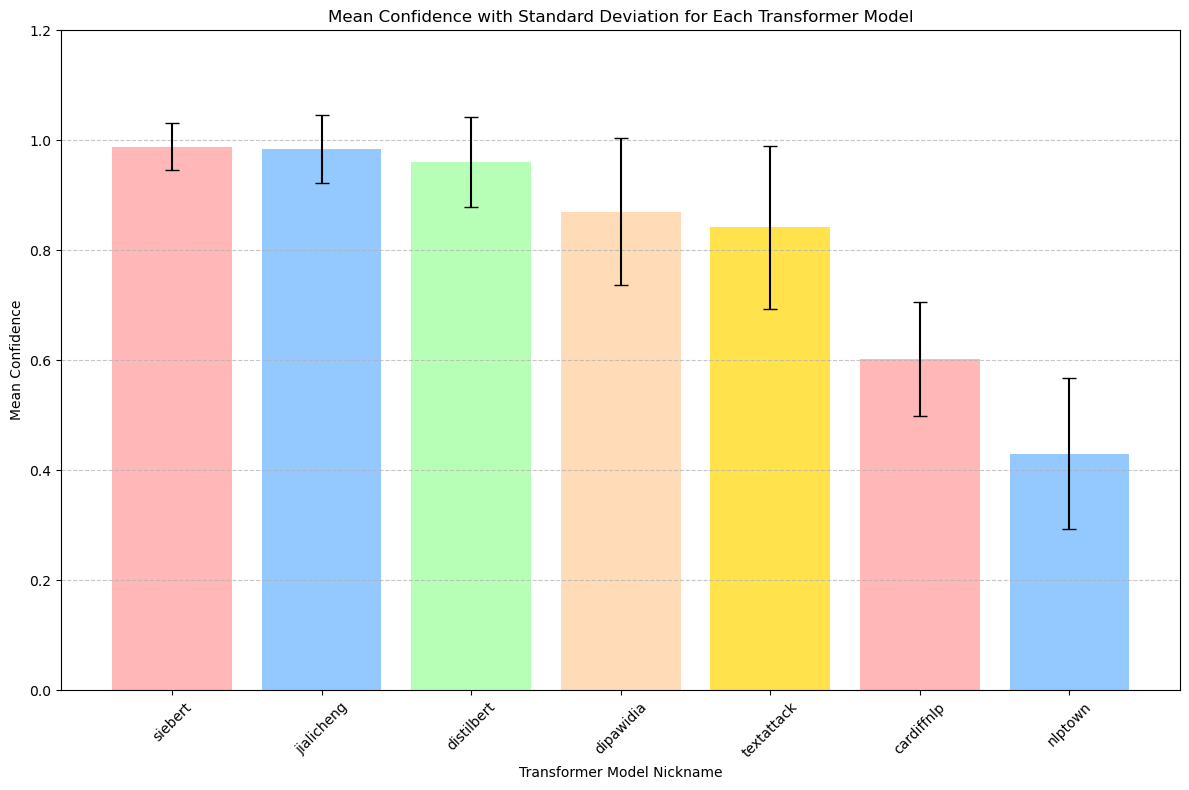

In [24]:
# Plotting the improved bar chart with error bars and increased upper ceiling for y-axis
plt.figure(figsize=(12, 8))

# Define colors for each bar
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']

bars = plt.bar(confidence_stats_df['Nickname'], confidence_stats_df['Mean Confidence'], 
               yerr=confidence_stats_df['St. Deviation'], capsize=5, color=colors, alpha=0.7)

# Add mean confidence values on top of each bar
for bar in bars:
    yval = bar.get_height()
    #plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom', fontsize=10)

plt.xlabel('Transformer Model Nickname')
plt.ylabel('Mean Confidence')
plt.title('Mean Confidence with Standard Deviation for Each Transformer Model')
plt.ylim(0, 1.2)  # Increased upper ceiling for y-axis
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the plot
plt.tight_layout()
plt.show()



In [25]:
#ANOVA
from scipy.stats import f_oneway

# Extract confidence columns
confidence_columns = [col for col in df.columns if col.endswith("confidence")]

# Perform ANOVA
anova_result = f_oneway(*[df[col].dropna() for col in confidence_columns])

anova_result


F_onewayResult(statistic=419.55244419905483, pvalue=1.7419364431177646e-233)

In [30]:
#Adhoc Turkey HSD tst
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm


# Extract confidence columns
confidence_columns = [col for col in df.columns if col.endswith("confidence")]

# Prepare data for Tukey's HSD test
melted_df = df.melt(value_vars=confidence_columns, var_name='Model', value_name='Confidence')

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=melted_df['Confidence'], groups=melted_df['Model'], alpha=0.05)

# Display results
tukey_result.summary();


### Summary of ANOVA and Tukey's HSD Test

#### Choice of Test
- **One-Way ANOVA**: Selected to compare the mean confidence scores of multiple independent groups (different transformer models).

#### Hypotheses
- **Null Hypothesis (H0)**: All group means (confidence scores) are equal.
- **Alternative Hypothesis (H1)**: At least one group mean (confidence score) is different.

#### Results
- **ANOVA Test**:
  - **F-statistic**: 419.55
  - **p-value**: 1.74e-233
  - Interpretation: The very low p-value indicates significant differences in mean confidence scores among the different transformer models.

### Tukey's HSD Post-Hoc Test
#### Hypotheses
- **Null Hypothesis (H0)**: The mean confidence scores of each pair of transformer models are equal.
- **Alternative Hypothesis (H1)**: The mean confidence scores of each pair of transformer models are different.
#### Results
- Significant differences were found in the mean confidence scores between most pairs of transformer models, indicating 
variability in model performance.
- The top 3 performers are significantly different in mean confidence in classifying sentiment from all other models 
but not between each other.

# Sentiment Distribution -P(Positive Label)

## Indexing

In [42]:
pos_prob_columns = [
    'siebert/sentiment-roberta-large-english_pos_prob',
    'cardiffnlp/twitter-roberta-base-sentiment_pos_prob',
    'jialicheng/electra-base-imdb_pos_prob',
    'textattack/albert-base-v2-SST-2_pos_prob',
    'dipawidia/xlnet-base-cased-product-review-sentiment-analysis_pos_prob',
    'nlptown/bert-base-multilingual-uncased-sentiment_pos_prob',
    'distilbert-base-uncased-finetuned-sst-2-english_pos_prob'
]

In [44]:
df[pos_prob_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   siebert/sentiment-roberta-large-english_pos_prob                       106 non-null    float64
 1   cardiffnlp/twitter-roberta-base-sentiment_pos_prob                     106 non-null    float64
 2   jialicheng/electra-base-imdb_pos_prob                                  106 non-null    float64
 3   textattack/albert-base-v2-SST-2_pos_prob                               106 non-null    float64
 4   dipawidia/xlnet-base-cased-product-review-sentiment-analysis_pos_prob  106 non-null    float64
 5   nlptown/bert-base-multilingual-uncased-sentiment_pos_prob              106 non-null    float64
 6   distilbert-base-uncased-finetuned-sst-2-english_pos_prob               106 non-null    floa

In [45]:
df[pos_prob_columns].describe().reset_index()

,index,siebert/sentiment-roberta-large-english_pos_prob,cardiffnlp/twitter-roberta-base-sentiment_pos_prob,jialicheng/electra-base-imdb_pos_prob,textattack/albert-base-v2-SST-2_pos_prob,dipawidia/xlnet-base-cased-product-review-sentiment-analysis_pos_prob,nlptown/bert-base-multilingual-uncased-sentiment_pos_prob,distilbert-base-uncased-finetuned-sst-2-english_pos_prob
0,count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
1,mean,0.735326,0.515913,0.761860,0.479129,0.300934,0.146709,0.498545
2,std,0.432459,0.153745,0.414192,0.373419,0.340589,0.075122,0.469441
3,min,0.000916,0.068597,0.000099,0.007955,0.004150,0.004465,0.000776
4,25%,0.112500,0.433996,0.730687,0.095701,0.032202,0.096289,0.012265
5,50%,0.992837,0.516065,0.999220,0.428056,0.110676,0.132659,0.440770
6,75%,0.997534,0.617725,0.999602,0.912340,0.605823,0.209055,0.991099
7,max,0.998839,0.829474,0.999718,0.996992,0.999516,0.369105,0.999771


In [37]:
# Define the top 3 most confident models
top_models = [
    'siebert/sentiment-roberta-large-english_pos_prob',
    'jialicheng/electra-base-imdb_pos_prob',
    'distilbert-base-uncased-finetuned-sst-2-english_pos_prob'
]

# Define the rest of the models in the desired order
bottom_models = [
    'dipawidia/xlnet-base-cased-product-review-sentiment-analysis_pos_prob',
    'textattack/albert-base-v2-SST-2_pos_prob',
    'cardiffnlp/twitter-roberta-base-sentiment_pos_prob',
    'nlptown/bert-base-multilingual-uncased-sentiment_pos_prob'
]


## Visual Transformer Sentiment Distribution

### Histograms

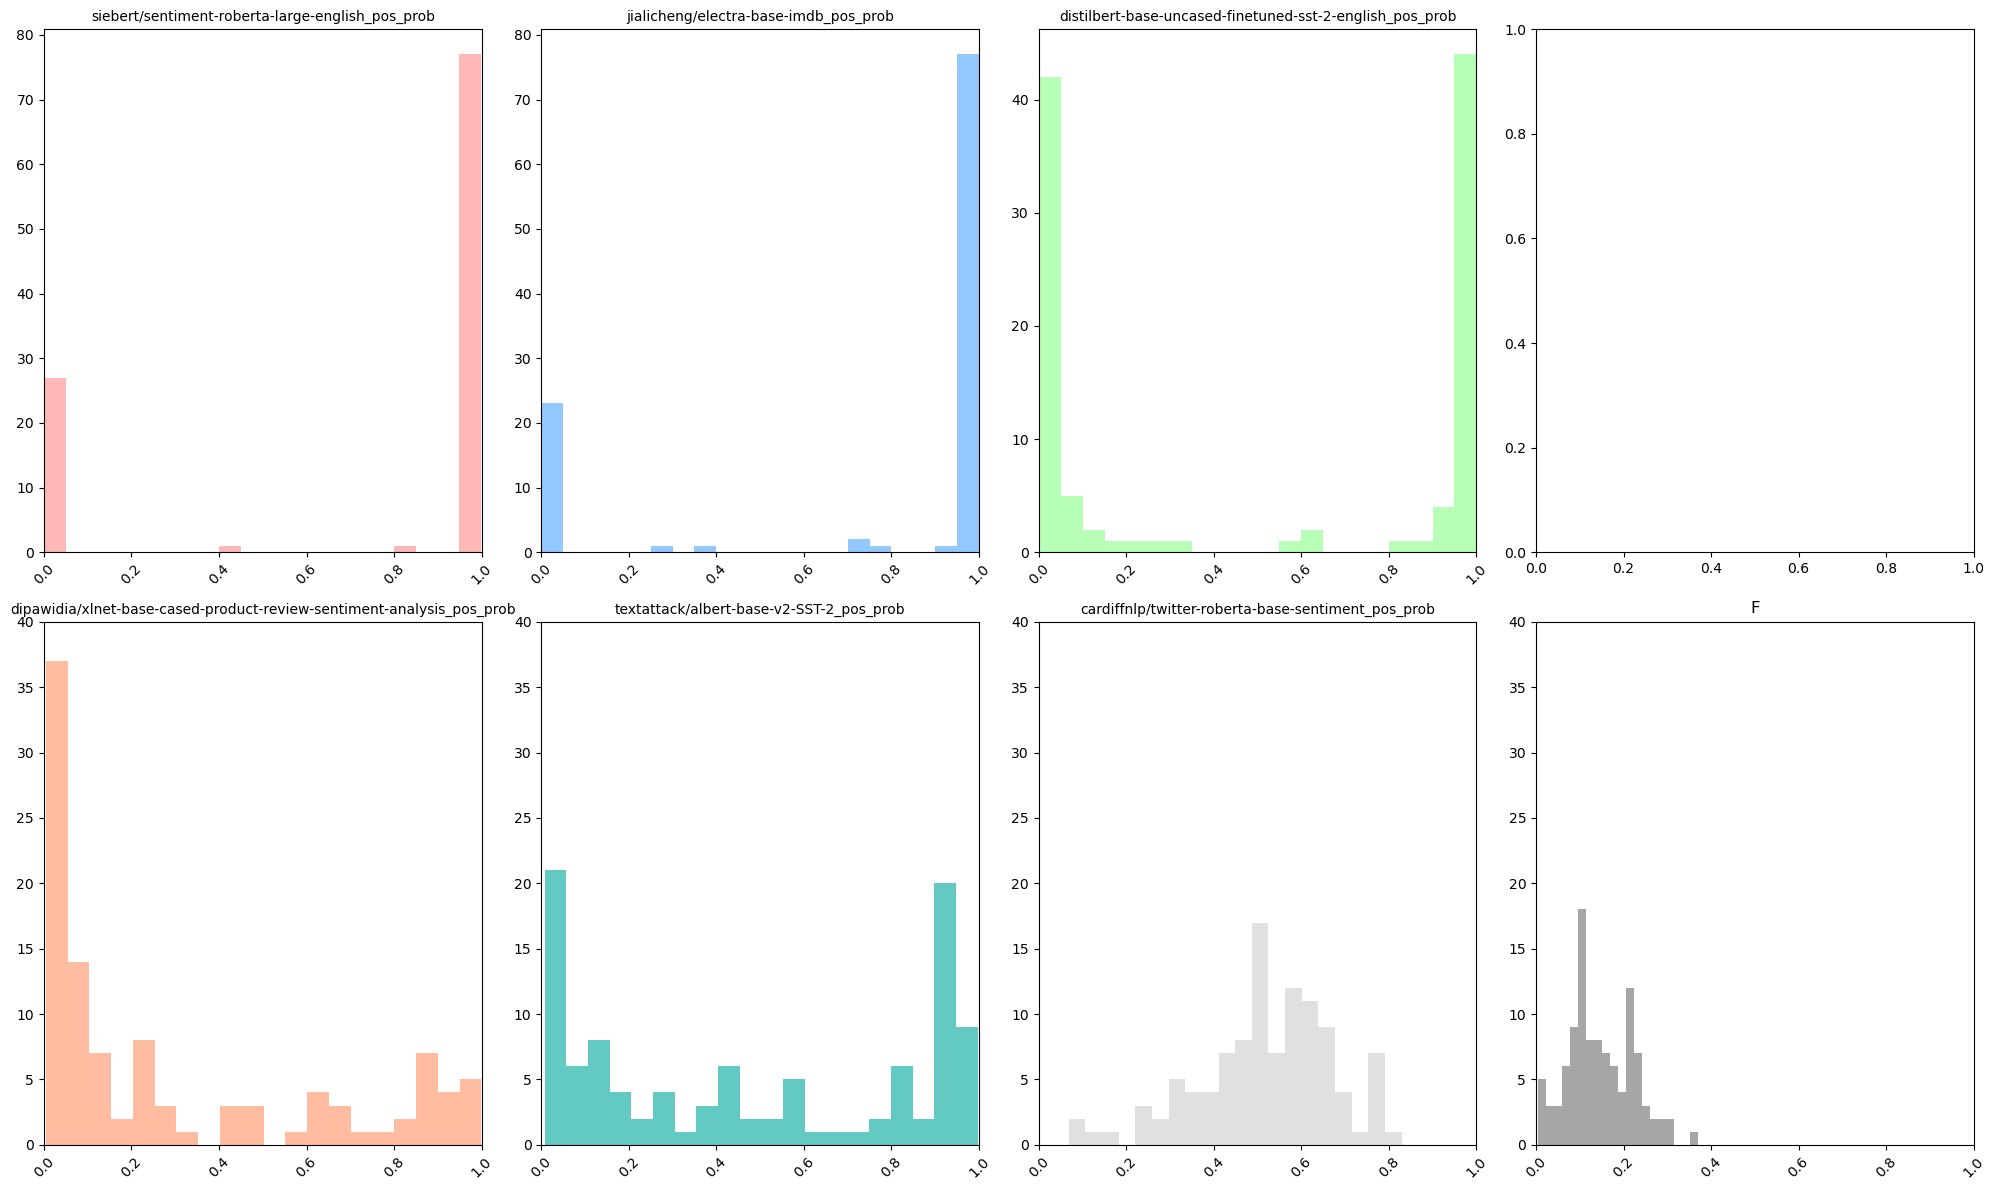

In [51]:
# Plot histograms using subplots for better control
fig, ax = plt.subplots(2, 4, figsize=(20, 12))

# Define the colors
top_colors = ['#FF9999', '#66B2FF', '#99FF99']
bottom_colors = ['#FFA07A', '#20B2AA', '#D3D3D3', '#808080']

# Plot top models in the top row
for i, col in enumerate(top_models):
    ax[0, i].hist(df[col].dropna(), bins=20, alpha=0.7, color=top_colors[i], label=col)
    ax[0, i].set_title(col, fontsize=10)
    ax[0, i].tick_params(axis='x', rotation=45)
    ax[1, i].set_ylim(0,80)
    ax[0, i].set_xlim(0, 1)  # Add this line to set x-axis limit

# Plot bot models in the bottom row
for i, col in enumerate(bottom_models):
    ax[1, i].hist(df[col].dropna(), bins=20, alpha=0.7, color=bottom_colors[i], label=col)
    ax[1, i].set_title(col, fontsize=10)
    ax[1, i].tick_params(axis='x', rotation=45)
    ax[1, i].set_ylim(0,40)
    ax[1, i].set_xlim(0, 1)  # Add this line to set x-axis limit
plt.title("F")    
plt.tight_layout()
plt.show()

## Density Plots

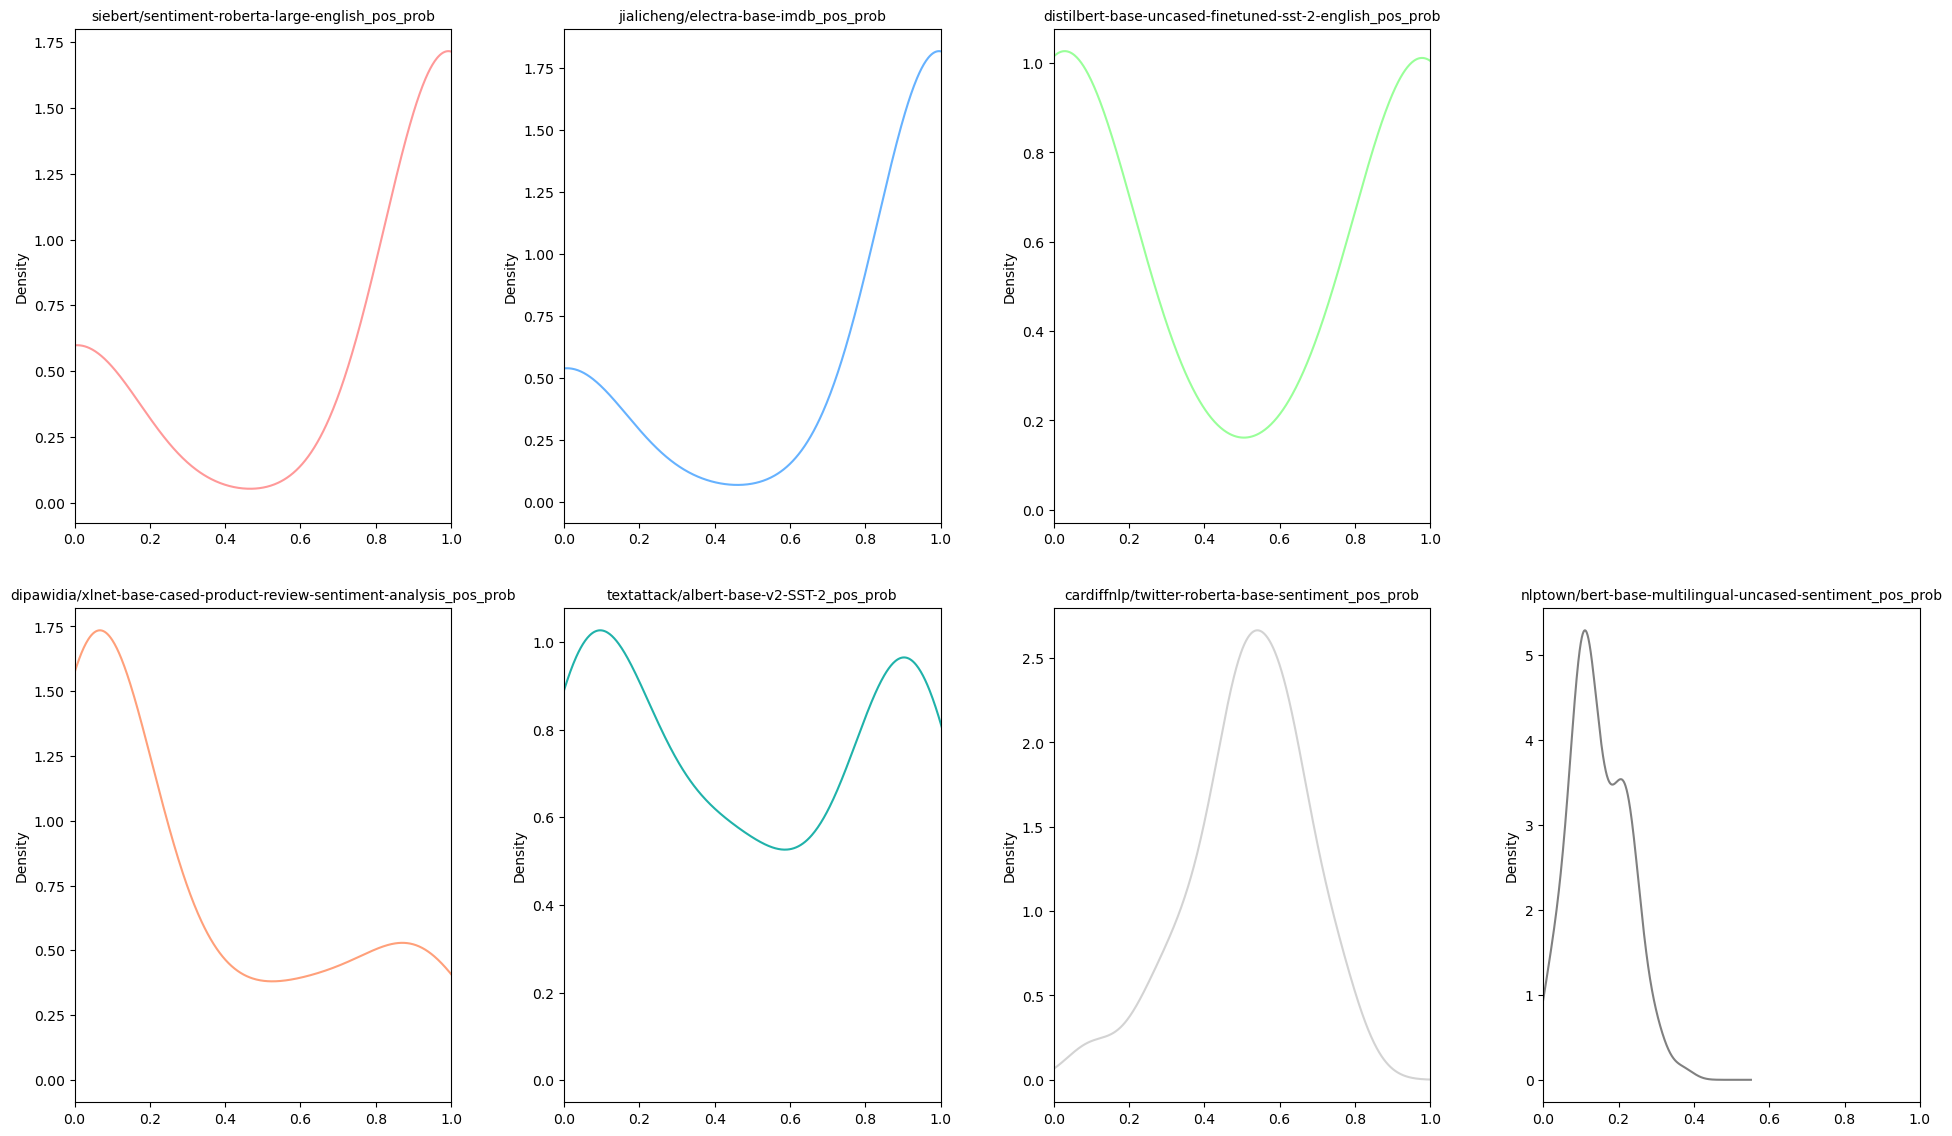

In [57]:
# Plot density plots using subplots for better control
fig, ax = plt.subplots(2, 4, figsize=(20, 12))

# Define the colors
top_colors = ['#FF9999', '#66B2FF', '#99FF99']
bottom_colors = ['#FFA07A', '#20B2AA', '#D3D3D3', '#808080']

# Plot top models in the top row
for i, col in enumerate(top_models):
    df[col].dropna().plot(kind='density', ax=ax[0, i], color=top_colors[i], label=col)
    ax[0, i].set_title(col, fontsize=10)
    ax[0, i].set_xlim(0, 1)  # Set x-axis limit

# Plot bottom models in the bottom row
for i, col in enumerate(bottom_models):
    df[col].dropna().plot(kind='density', ax=ax[1, i], color=bottom_colors[i], label=col)
    ax[1, i].set_title(col, fontsize=10)
    ax[1, i].set_xlim(0, 1)  # Set x-axis limit

# Hide any unused subplots in the top row
if len(top_models) < 4:
    for j in range(len(top_models), 4):
        fig.delaxes(ax[0, j])

plt.tight_layout(pad=3.0)
plt.show()